## California Housing Prices

### 1. DataSet 접근하여 살펴보기

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

%matplotlib inline

In [48]:
housing = pd.read_csv('./califoniaHousing/housing.csv')

##### 파일 정보

1. longitude: 경도

2. latitude: 위도

3. housingMedianAge: 주택나이 (중앙값)

4. totalRooms: 전체 방 수

5. totalBedrooms: 전체 침실 수

6. population:  인구

7. households: 세대

8. medianIncome: 소득 (중앙값)

9. medianHouseValue: 주택 가치 (중앙값

10. oceanProximity: w.r.t 바다/해상 위치

In [49]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [50]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [51]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [52]:
# value_counts()를 이용해 컬럼의 Series의 unique value들을 count해본다.
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

##### 1-1. 전처리 요건
info와 describe로 데이터셋을 살펴 본 결과,

- total_bedrooms 의 결측값을 채워야한다.
- ocean_proximity의 카테고리형 데이터(Categorical Data)를 수치형 데이터(Numerical Data)로 변환시킬 필요가 있다.

##### 1-2. 상관계수 조사

In [53]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


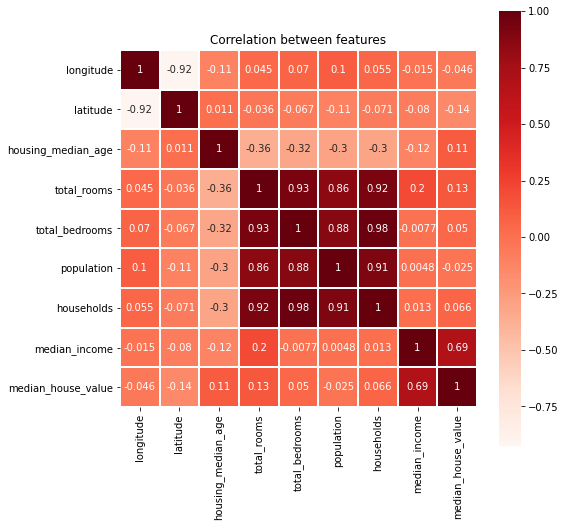

In [54]:
# 히트맵
# 'total_rooms', 'households', 'total_bedrooms', 'population' 간의 높은 상관관계
plt.figure(figsize=(8, 8))
sns.heatmap(housing.corr(), square=True, annot=True, linewidth=0.01, cmap=plt.cm.Reds, linecolor='white')
plt.title('Correlation between features')
plt.show()

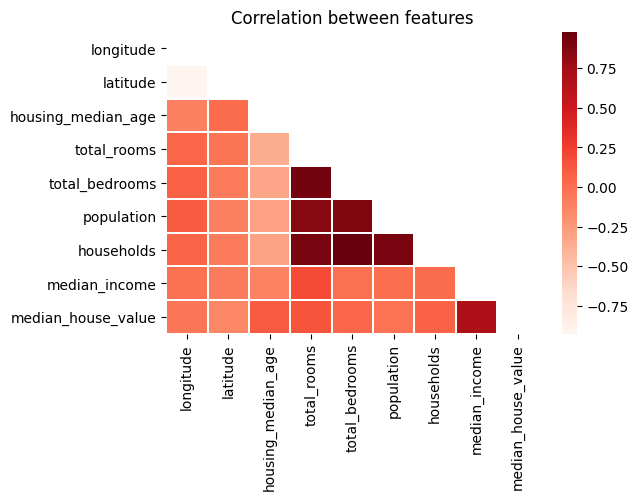

In [55]:
mask = np.triu(np.ones_like(housing.corr(), dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation between features')
sns.heatmap(housing.corr(), mask=mask, annot=False, linewidth=0.01, cmap=plt.cm.Reds, linecolor='white', fmt = "0.2f")
plt.xticks(rotation=90) 
plt.yticks(rotation = 0)
plt.show()

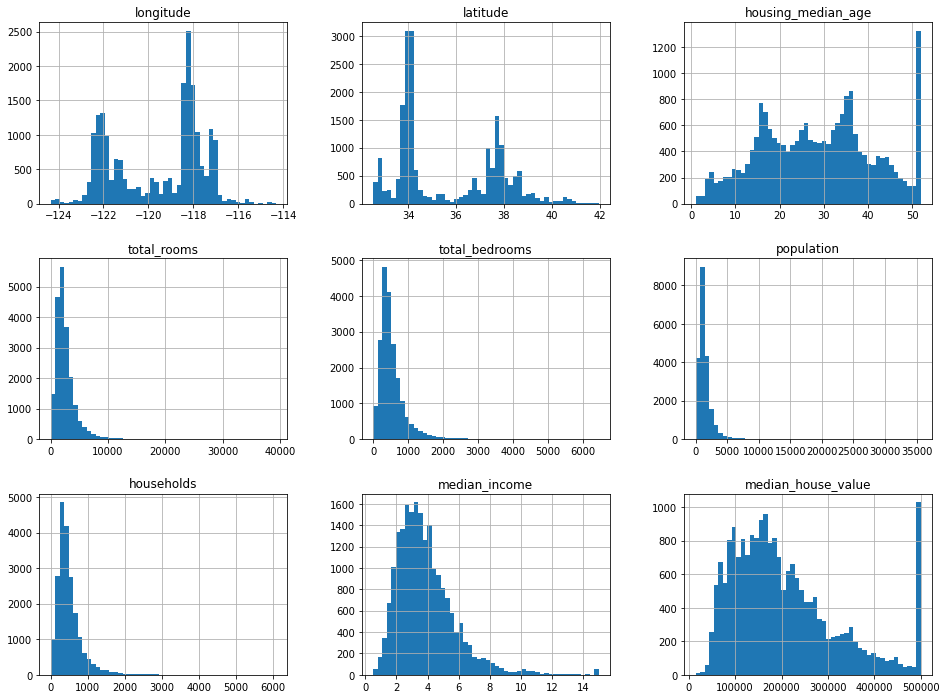

In [56]:
# 히스토그램
housing.hist(bins=50, figsize=(16,12))
plt.show()

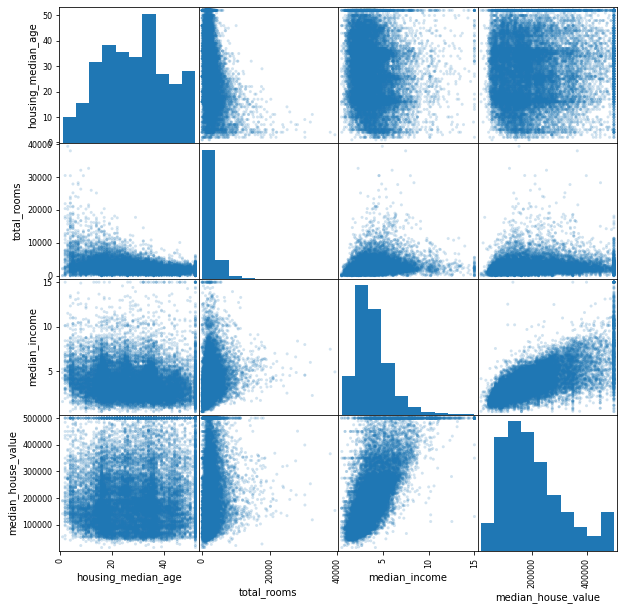

In [57]:
# 상관관계가 높아보이는 'housing_median_age', 'total_rooms' , 'median_income', 'median_house_value' 만을 이용하여 
# 산점도 그래프를 만들어본다.
attributes = ['housing_median_age', 'total_rooms' , 'median_income', 'median_house_value']
fig = scatter_matrix(housing[attributes], figsize=(10, 10), alpha=0.2)

산점도 그래프를 살펴 본 결과, 

- 'median_income' 과 'median_house_value' 가 가장 상관 관계가 있어보인다.
- 'housing_median_age' 와 'median_house_value' 의 최댓값과 최솟값이 한정되어 있다. <br>
  이러한 형태는 학습하지 않도록 전처리 하는 것이 좋다.
- 특성들의 스케일이 서로 많이 다르다.

##### 1-3. 지리적 데이터 조사

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

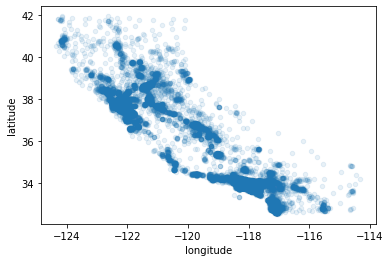

In [58]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

'Bay Area', 'Los Angeles', 'SanDiego' 등 의 지역이 밀집도가 높음

C:\Users\izimi\.conda\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\izimi\.conda\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\izimi\.conda\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\izimi\.conda\envs\ds\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0, flags=flags)


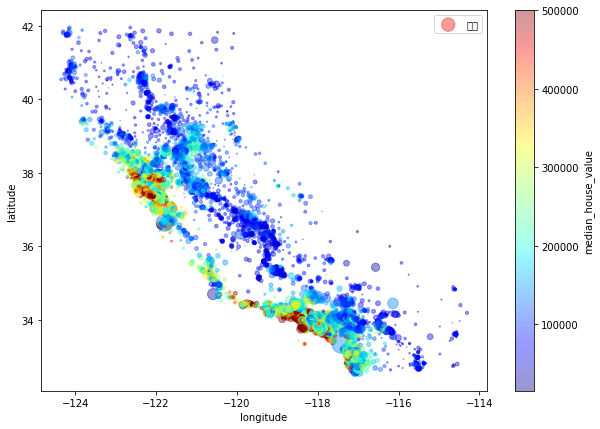

In [59]:
ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="인구", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
ax.set(xlabel='longitude', ylabel='latitude')
plt.legend()

주택 가격이 인구 밀도와 관려이 깊음을 알 수 있다. 후에 군집 알고리즘을 사용

### 2. Data 전처리

#### 2-1. 레이블 추가<br>
특정 구역의 방 개수는 얼마나 많은 가구수가 있는지는 그다지 유용하지 않다. 특성을 조합하여 새로운 레이블들을 추가한다. <br>
데이터셋에 세 열을 추가 : 'rooms per household' / 'bedrooms per room' / 'population per household'

In [60]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [61]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

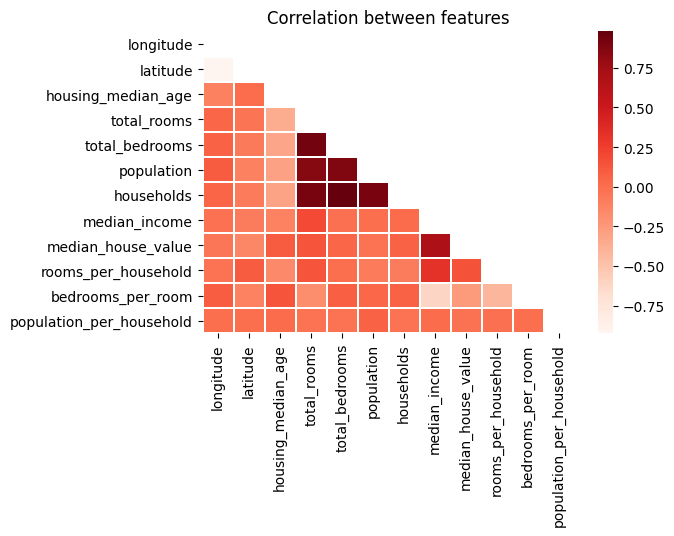

In [62]:
mask = np.triu(np.ones_like(housing.corr(), dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation between features')
sns.heatmap(housing.corr(), mask=mask, annot=False, linewidth=0.01, cmap=plt.cm.Reds, linecolor='white', fmt = "0.2f")
plt.xticks(rotation=90) 
plt.yticks(rotation = 0)
plt.show()

개별변수보다 파생변수가 조금더 상관계수가 높게 나타난다.

#### 2-2. one-hot encoding
ocean_proximity의 카테고리형 데이터(Categorical Data)를 수치형 데이터(Numerical Data)로 변환시킬 필요가 있다.

In [83]:
df = pd.get_dummies(data=housing, columns=['ocean_proximity'])

#### 2-3. 결측치처리
'total_bedrooms' 의 결측값(null)을 채워야한다.<br>
imputer를 사용해 결측값을 각각의 행의 평균값으로 치환해준다.

In [84]:
from sklearn.impute import SimpleImputer

In [85]:
imputer = SimpleImputer(strategy='median')

In [86]:
imputer.fit(housing[['total_bedrooms']])

SimpleImputer(strategy='median')

In [87]:
result = imputer.transform(housing[['total_bedrooms']])

In [88]:
# update
housing[['total_bedrooms']] = result
housing[['total_bedrooms']].isnull().sum()

total_bedrooms    0
dtype: int64

In [89]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20433 non-null  float64
 12  population_per_household  20640 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.0+ MB


In [90]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [91]:
imputer.fit(df)

SimpleImputer(strategy='median')

In [92]:
housing_tr = pd.DataFrame(imputer.transform(df), columns=df.columns)

In [93]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0


#### 2-4. 정규화 (스케일링)

In [98]:
from sklearn.preprocessing import StandardScaler

In [100]:
# StandardScaler
scaler = StandardScaler()
scaler.fit(housing_tr)
scaled_df = scaler.fit_transform(housing_tr)
scaled_df.shape

(20640, 16)

In [142]:
# MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(housing_tr) 
scaled_df = scaler.fit_transform(housing_tr)
scaled_df.shape

(20640, 16)

In [143]:
# MaxAbsScaler
scaler = MinMaxScaler()
scaler.fit(housing_tr)
scaled_df = scaler.fit_transform(housing_tr)
scaled_df.shape

(20640, 16)

In [144]:
# RobustScaler
scaler = RobustScaler()
scaler.fit(housing_tr)
scaled_df = scaler.fit_transform(housing_tr)
scaled_df.shape

(20640, 16)

#### 2-5. 파이프라인 

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [102]:
from sklearn.base import BaseEstimator, TransformerMixin

# 컬럼 인덱스
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [103]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs, 
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.80226,8.288136,2.80226
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,6.281853,2.181467


In [105]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [106]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

#### 2-6. 학습용, 테스트용 데이터 분리

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, housing_labels, test_size=0.2, random_state=123)

In [109]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(16512, 16) (4128, 16) (16512,) (4128,)


### 3. 모델선택 및 훈련

#### 3-1. LinearRegression

In [111]:
from sklearn.linear_model import LinearRegression

In [112]:
lin_reg = LinearRegression(n_jobs=-1)
lin_reg.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [113]:
# calculate mean squared error
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

67992.20026536225


#### 3-2. DecisionTreeRegressor

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [116]:
# calculate mean squared error
y_pred = tree_reg.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

67666.48875106325


#### 3-3. RandomForest

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor()

In [119]:
# calculate mean squared error
y_pred = forest_reg.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

47981.391770502974


#### 3-4. SVR

In [120]:
from sklearn.svm import SVR

In [121]:
svm_reg = SVR(kernel="linear")
svm_reg.fit(x_train, y_train)

SVR(kernel='linear')

In [122]:
# calculate mean squared error
y_pred = svm_reg.predict(x_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

107400.06977743996


### 4. 모델 세부 튜닝

In [131]:
from sklearn.model_selection import cross_val_score

#### 4-1. LinearRegression

In [157]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())

In [158]:
lin_scores = cross_val_score(lin_reg, x_test, y_test,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [ 68042.06656044  67475.10821219  67093.62948818  68805.42154429
 159591.59779452  64010.06682699  67755.3997456   92959.01318805
  65799.06908205  60743.31089865]
평균: 78227.46833409462
표준편차: 28356.99660155705


#### 4-2. DecisionTreeRegressor

In [159]:
scores = cross_val_score(tree_reg, x_test, y_test,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

점수: [78253.57646514 72855.27873979 73171.40454539 72272.19212474
 78408.87915178 75018.30295502 71951.28512758 84449.38373158
 74496.14865943 72962.41978579]
평균: 75383.88712862434
표준편차: 3729.7251858086033


#### 4-3. RandomForest

In [149]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)
forest_reg.fit(x_test, y_pred)

RandomForestRegressor(n_estimators=10, random_state=42)

In [154]:
housing_predictions = forest_reg.predict(x_test)
forest_mse = mean_squared_error(y_test, y_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

107400.06977743996

In [155]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, x_test, y_test,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [53988.20404312 56511.79416958 56676.71616934 55843.94295481
 55738.45871624 53381.34916244 56760.46424003 59982.62175932
 58029.64150438 54361.3010686 ]
평균: 56127.449378785444
표준편차: 1865.454855852237


In [156]:
scores = cross_val_score(lin_reg, x_test, y_test, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count        10.000000
mean      78227.468334
std       29890.898954
min       60743.310899
25%       66122.709184
50%       67615.253979
75%       68614.582798
max      159591.597795
dtype: float64

#### 4-4. SVR

In [160]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(x_test, y_test)
housing_predictions = svm_reg.predict(x_test)
svm_mse = mean_squared_error(y_test, y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

107400.06977743996